### **Import all the needed libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


### Load the data

In [3]:
df = pd.read_csv("car_data.csv")
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [262]:
df.shape

(23906, 16)


## Check for:

#### 1-Missing values

#### 2-Duplicated values

#### 3-Correct datatype


In [263]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


### 1-Checking for null values

We can see that we have one missing values in the "Customer Name" column, and we cannot fill the missing values with arbitrary data so I decided to drop it.

In [4]:
df = df.dropna(axis=0, how='any')
df.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

### 2-Checking for duplicated values


In [5]:
df.duplicated().sum()

np.int64(0)

### 3-Checking for correct data type

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23905 non-null  object
 1   Date           23905 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23905 non-null  object
 4   Annual Income  23905 non-null  int64 
 5   Dealer_Name    23905 non-null  object
 6   Company        23905 non-null  object
 7   Model          23905 non-null  object
 8   Engine         23905 non-null  object
 9   Transmission   23905 non-null  object
 10  Color          23905 non-null  object
 11  Price ($)      23905 non-null  int64 
 12  Dealer_No      23905 non-null  object
 13  Body Style     23905 non-null  object
 14  Phone          23905 non-null  int64 
 15  Dealer_Region  23905 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.1+ MB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           23905 non-null  datetime64[ns]
 1   Annual Income  23905 non-null  int64         
 2   Company        23905 non-null  object        
 3   Model          23905 non-null  object        
 4   Engine         23905 non-null  object        
 5   Transmission   23905 non-null  object        
 6   Color          23905 non-null  object        
 7   Price ($)      23905 non-null  int64         
 8   Body Style     23905 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.8+ MB


After doing the main steps in cleaning the data (nulls/duplicated/datatype)
We can now look for unique values in the dataset to see if we have columns with only two unique categorical values (binary categories)
to use label encoding, or 3-5 values for one-hot encoding (multiple categories) (I chose 3-5 because it seems as a good number to use one hot encoding instead of having something like 3-10 values, so I don't add a lot of extra columns

In [13]:
df.nunique()

Date              612
Annual Income    2508
Company            30
Model             154
Engine              2
Transmission        2
Color               3
Price ($)         870
Body Style          5
dtype: int64

In [270]:
for col in ['Gender', 'Engine', 'Transmission', 'Color', 'Body Style']:
    print(df[col].value_counts())
    print("-------------------------------")

Gender
Male      18797
Female     5108
Name: count, dtype: int64
-------------------------------
Engine
DoubleÂ Overhead Camshaft    12570
Overhead Camshaft            11335
Name: count, dtype: int64
-------------------------------
Transmission
Auto      12570
Manual    11335
Name: count, dtype: int64
-------------------------------
Color
Pale White    11255
Black          7857
Red            4793
Name: count, dtype: int64
-------------------------------
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2970
Name: count, dtype: int64
-------------------------------


-Gender: Male, Female (2)
-Engine: DoubleÂ Overhead Camshaft,Overhead Camshaft (2)
-Transmission: Auto, Manual (2)
-Color: Black, Red, Pale White (3)
-Body Style: SUV, Hatchback, Sedan, Passenger, Hardtop (5)


## Encoding process:

#### 1-Label encoding for binary values (2 values)

In [271]:
enc_gender = LabelEncoder()
df['Gender'] = enc_gender.fit_transform(df['Gender'])

enc_engine = LabelEncoder()
df['Engine'] = enc_engine.fit_transform(df['Engine'])

enc_trans = LabelEncoder()
df['Transmission'] = enc_trans.fit_transform(df['Transmission'])

#### 2-One hot encoder for multiple values 3+

In [272]:
hot_encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
encoded_color = hot_encoder.fit_transform(df[['Color']])
encoded_bodystyle = hot_encoder.fit_transform(df[['Body Style']])

Explanation:
hot_encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

- sparse_output=False --> Give me normal data, not the memory-efficient sparse format (if it is set to True, it will return something called "sparse matrix" which will look weird because it will give us something like "(0,2) 1.0" means "row 0, column 2 has a value of 1" so it will just save memory.
- but if you set it to False it will have the normal columns like:
- [ 0 , 0 , 1 ]


- .set_output(transform='pandas') --> Return a DataFrame format with column names, not just a numpy array (no column names)

In the one hot encoder, it will create a separate table, so we need to merge (concat) these tables with our original table and drop the old columns

### Merging back the encoded columns

In [273]:
df = pd.concat([df, encoded_color], axis=1).drop(columns= ['Color'])
df = pd.concat([df, encoded_bodystyle], axis=1).drop(columns= ['Body Style'])

Explanation:
pd.concat([df, encoded_bodystyle], axis=1).drop(columns= ['Body Style'])
 - [original df, encoded columns]
 - axis = 1 (means column, 0 is for rows)
 - .drop(columns = ['before encoded column'] to remove the old column

In [274]:
df


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,...,Phone,Dealer_Region,Color_Black,Color_Pale White,Color_Red,Body Style_Hardtop,Body Style_Hatchback,Body Style_Passenger,Body Style_SUV,Body Style_Sedan
0,C_CND_000001,2022-01-02,Geraldine,1,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,0,0,...,8264678,Middletown,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,C_CND_000002,2022-01-02,Gia,1,1480000,C & M Motors Inc,Dodge,Durango,0,0,...,6848189,Aurora,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,C_CND_000003,2022-01-02,Gianna,1,1035000,Capitol KIA,Cadillac,Eldorado,1,1,...,7298798,Greenville,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,C_CND_000004,2022-01-02,Giselle,1,13500,Chrysler of Tri-Cities,Toyota,Celica,1,1,...,6257557,Pasco,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,C_CND_000005,2022-01-02,Grace,1,1465000,Chrysler Plymouth,Acura,TL,0,0,...,7081483,Janesville,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Martin,1,13500,C & M Motors Inc,Plymouth,Voyager,1,1,...,8583598,Pasco,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
23902,C_CND_023903,2023-12-31,Jimmy,0,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,0,0,...,7914229,Middletown,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23903,C_CND_023904,2023-12-31,Emma,1,705000,Chrysler of Tri-Cities,BMW,328i,1,1,...,7659127,Scottsdale,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23904,C_CND_023905,2023-12-31,Victoire,1,13500,Chrysler Plymouth,Chevrolet,Metro,0,0,...,6030764,Austin,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **Data before: log transformation and outliers handling**

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Price ($)'}>,
        <Axes: title={'center': 'Color_Black'}>,
        <Axes: title={'center': 'Color_Pale White'}>],
       [<Axes: title={'center': 'Color_Red'}>,
        <Axes: title={'center': 'Body Style_Hardtop'}>,
        <Axes: title={'center': 'Body Style_Hatchback'}>,
        <Axes: title={'center': 'Body Style_Passenger'}>],
       [<Axes: title={'center': 'Body Style_SUV'}>,
        <Axes: title={'center': 'Body Style_Sedan'}>, <Axes: >, <Axes: >]],
      dtype=object)

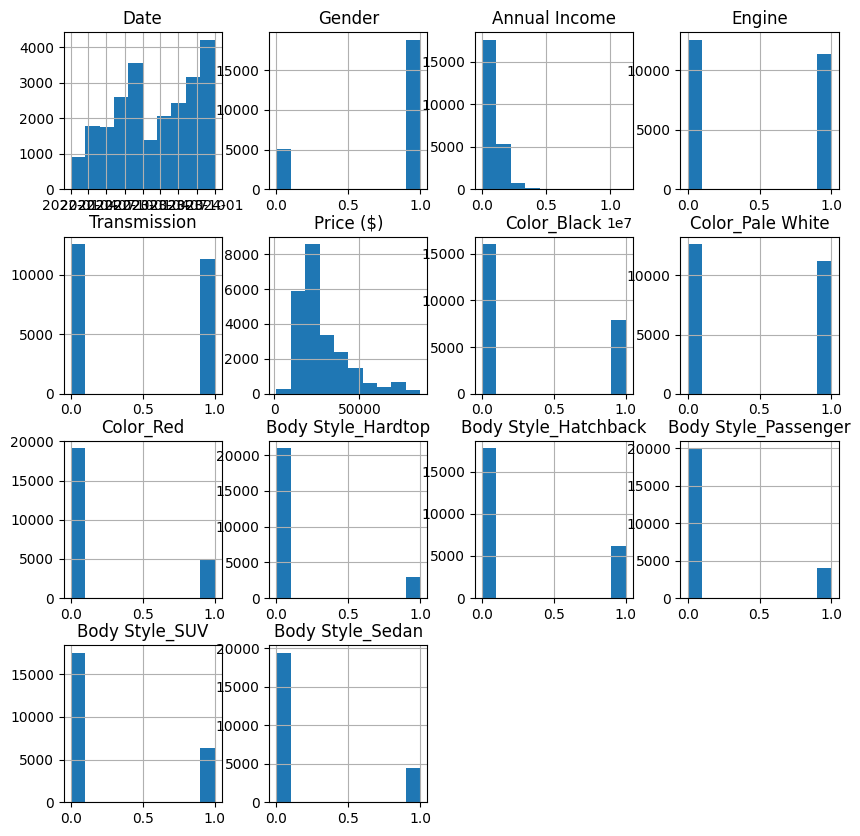

In [276]:
df.hist(figsize=(10,10))

### log transform the original data before splitting.

In [277]:
for col in ['Price ($)', 'Annual Income']:
    df[col] = np.log1p(df[col])

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Price ($)'}>,
        <Axes: title={'center': 'Color_Black'}>,
        <Axes: title={'center': 'Color_Pale White'}>],
       [<Axes: title={'center': 'Color_Red'}>,
        <Axes: title={'center': 'Body Style_Hardtop'}>,
        <Axes: title={'center': 'Body Style_Hatchback'}>,
        <Axes: title={'center': 'Body Style_Passenger'}>],
       [<Axes: title={'center': 'Body Style_SUV'}>,
        <Axes: title={'center': 'Body Style_Sedan'}>, <Axes: >, <Axes: >]],
      dtype=object)

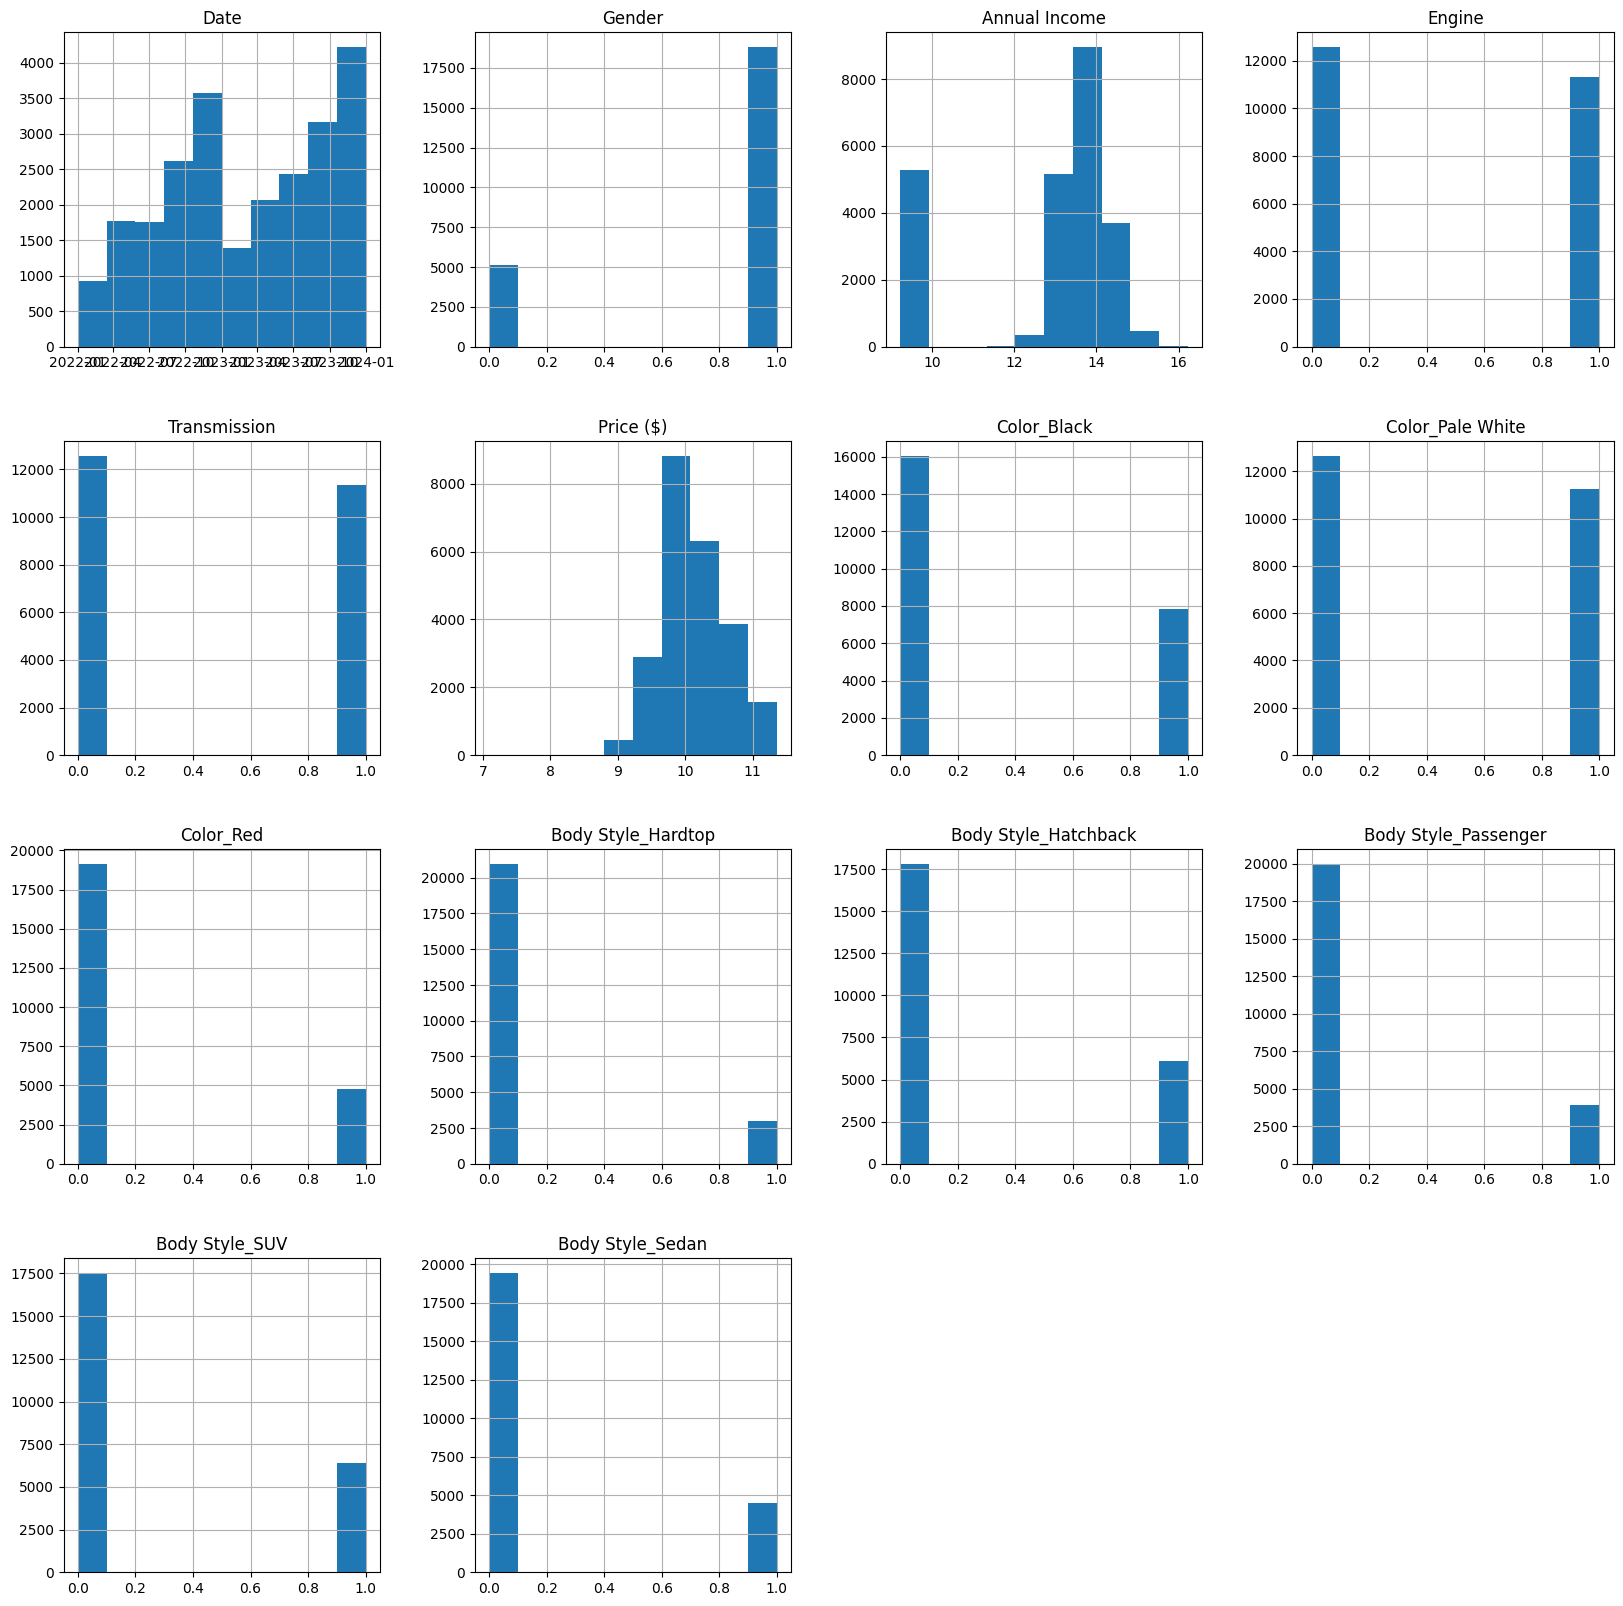

In [278]:
df.hist(figsize=(20,20))

# **Separate the data based on gender to visualize**

In [279]:
print(enc_gender.classes_)

['Female' 'Male']


female: 0
male: 1
in the label encoder (by index)

In [280]:
male_df = df[df['Gender'] == 1].reset_index(drop = True)
female_df = df[df['Gender'] == 0].reset_index(drop = True)

In [281]:
male_df.shape

(18797, 22)

In [282]:
female_df.shape

(5108, 22)

#### **Male box plot for price and annual income**

Explanation:
plt.gca() -> "get current axe object" (the area the box plot gets drawn in)
yaxis -> the bar on the right
.set_major_formatter -> is a method in the axes object which with it we can access the number displayed on the bar "ex: 80k, 60k, etc..."
ticker -> use the matplot.ticker library which has the underneath function, ticker is a nickname i chose
FuncFormatter(function) -> this is where the calculation happens to display the numbers
lambda num, p: f'{int(num):,} -> num is the actual number value (just a variable name), p is not used but the FuncFormatter method requires it so i just added it

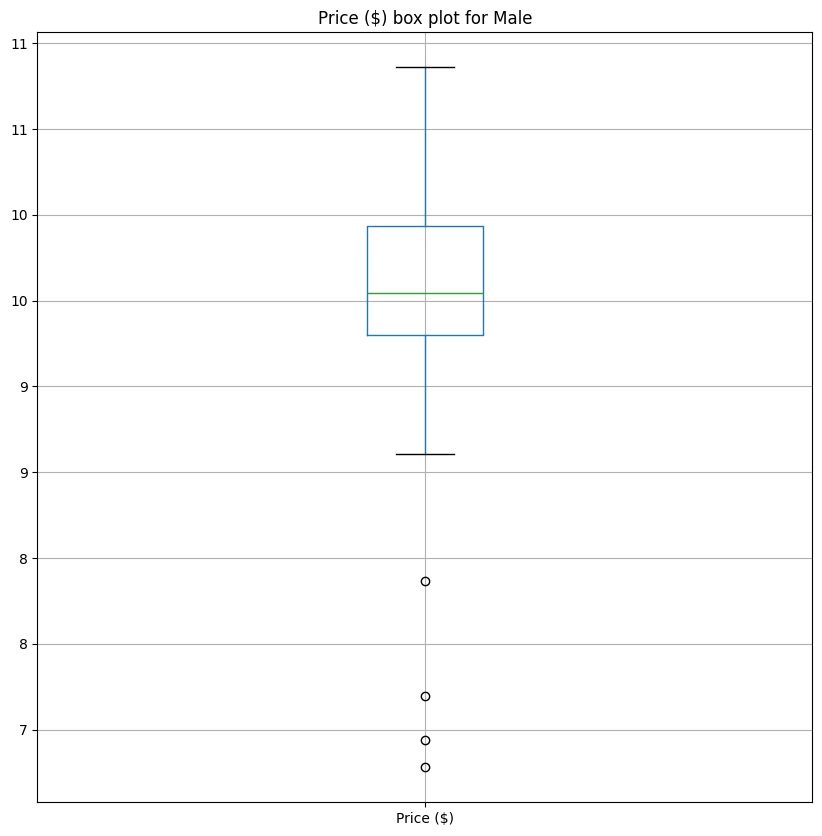

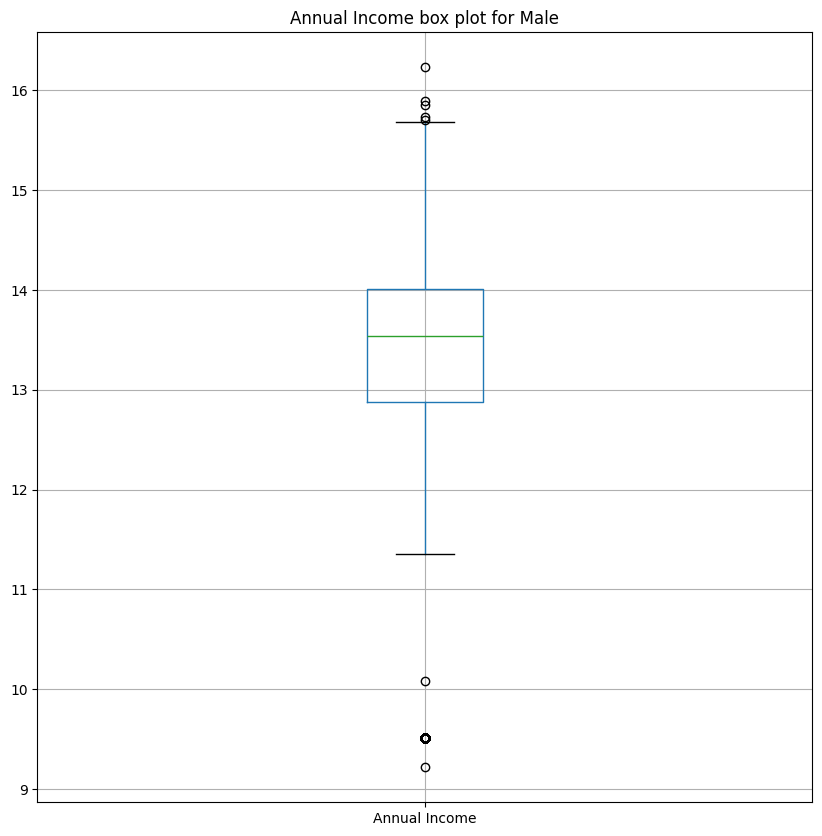

In [283]:
for col in ['Price ($)', 'Annual Income']:
    plt.figure(figsize=(10, 10))
    male_df.boxplot(column= col )
    plt.title(f"{col} box plot for Male")
    ax = plt.gca()  # Get current axes
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda num, p: f'{int(num):,}'))
    plt.show()


Male statistics

In [284]:
male_df.describe()

,Date,Gender,Annual Income,Engine,Transmission,Price ($),Color_Black,Color_Pale White,Color_Red,Body Style_Hardtop,Body Style_Hatchback,Body Style_Passenger,Body Style_SUV,Body Style_Sedan
count,18797,18797.0,18797.000000,18797.000000,18797.000000,18797.000000,18797.000000,18797.000000,18797.000000,18797.000000,18797.000000,18797.000000,18797.000000,18797.000000
mean,2023-02-28 12:56:29.902643968,1.0,12.821370,0.474863,0.474863,10.124800,0.330053,0.468532,0.201415,0.123584,0.256956,0.162898,0.268075,0.188488
min,2022-01-02 00:00:00,1.0,9.218408,0.000000,0.000000,7.280008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-09-21 00:00:00,1.0,12.880294,0.000000,0.000000,9.798238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023-03-08 00:00:00,1.0,13.541075,0.000000,0.000000,10.043293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023-09-05 00:00:00,1.0,14.006132,1.000000,1.000000,10.434145,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2023-12-31 00:00:00,1.0,16.231424,1.000000,1.000000,11.359786,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.0,1.819502,0.499381,0.499381,0.472076,0.470244,0.499022,0.401068,0.329115,0.436966,0.369283,0.442968,0.391111


#### Histogram male before:

In [285]:
for col in ['Price ($)', 'Annual Income']:
    df[col] = np.log1p(df[col])

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Price ($)'}>,
        <Axes: title={'center': 'Color_Black'}>,
        <Axes: title={'center': 'Color_Pale White'}>],
       [<Axes: title={'center': 'Color_Red'}>,
        <Axes: title={'center': 'Body Style_Hardtop'}>,
        <Axes: title={'center': 'Body Style_Hatchback'}>,
        <Axes: title={'center': 'Body Style_Passenger'}>],
       [<Axes: title={'center': 'Body Style_SUV'}>,
        <Axes: title={'center': 'Body Style_Sedan'}>, <Axes: >, <Axes: >]],
      dtype=object)

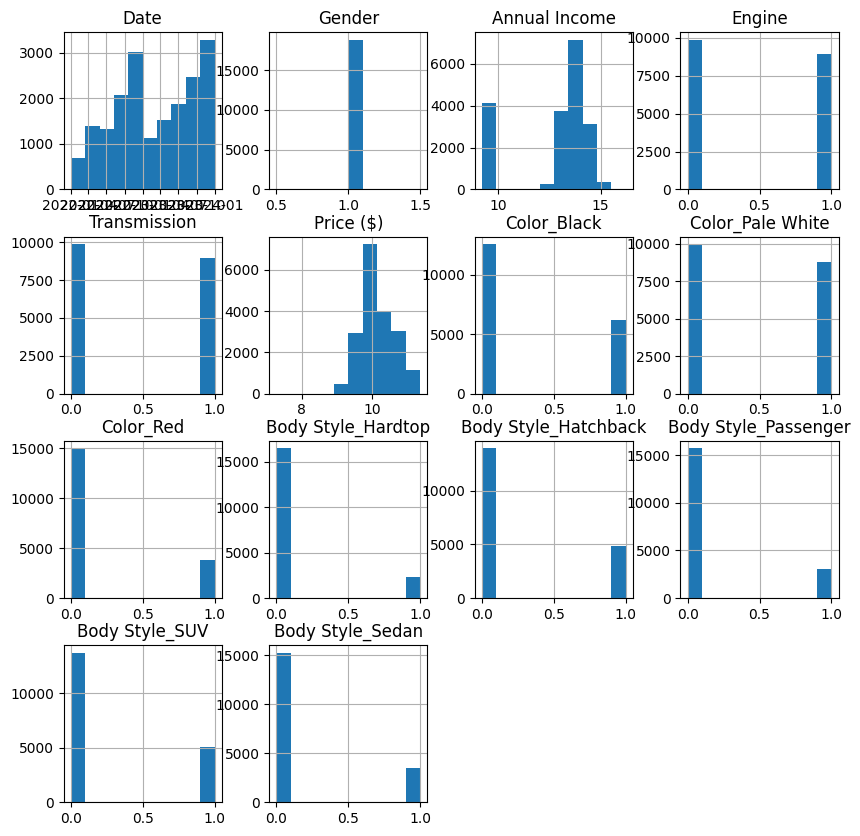

In [286]:
    male_df.hist(figsize=(10,10))

**Log transform to fix skewness then get rid of outliers with IQR (for price and annual income) Male**

In [287]:
for col in ['Price ($)', 'Annual Income']:
    male_df[col] = np.log1p(male_df[col])

In [288]:
clean_male_df = male_df.copy()
for col in ['Price ($)', 'Annual Income']:
    q1 = clean_male_df[col].quantile(0.25)
    q3 = clean_male_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    clean_male_df = clean_male_df[(clean_male_df[col] >= lower_bound) & (clean_male_df[col] <= upper_bound)] #the inside is just the same as saying df['gender'] == 0

print(f"Before: {len(male_df)}")
print(f"After: {len(clean_male_df)}")


Before: 18797
After: 14654


#### Histogram male after:

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Price ($)'}>,
        <Axes: title={'center': 'Color_Black'}>,
        <Axes: title={'center': 'Color_Pale White'}>],
       [<Axes: title={'center': 'Color_Red'}>,
        <Axes: title={'center': 'Body Style_Hardtop'}>,
        <Axes: title={'center': 'Body Style_Hatchback'}>,
        <Axes: title={'center': 'Body Style_Passenger'}>],
       [<Axes: title={'center': 'Body Style_SUV'}>,
        <Axes: title={'center': 'Body Style_Sedan'}>, <Axes: >, <Axes: >]],
      dtype=object)

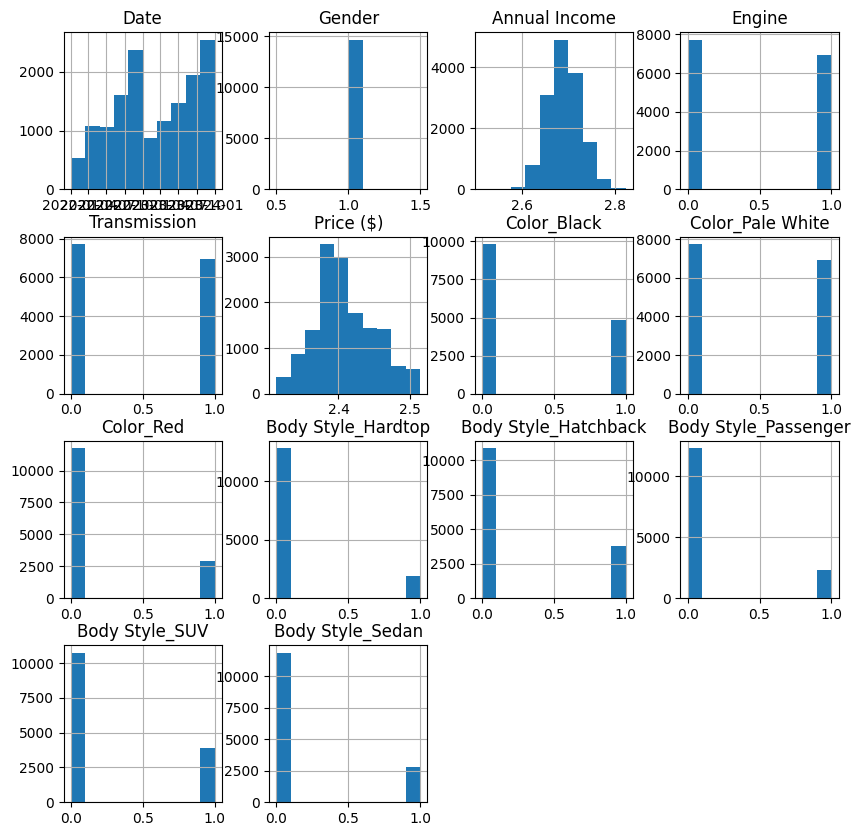

In [289]:
clean_male_df.hist(figsize=(10,10))

**=================================================================================================================================**

##### **Female box plot for price and annual income**

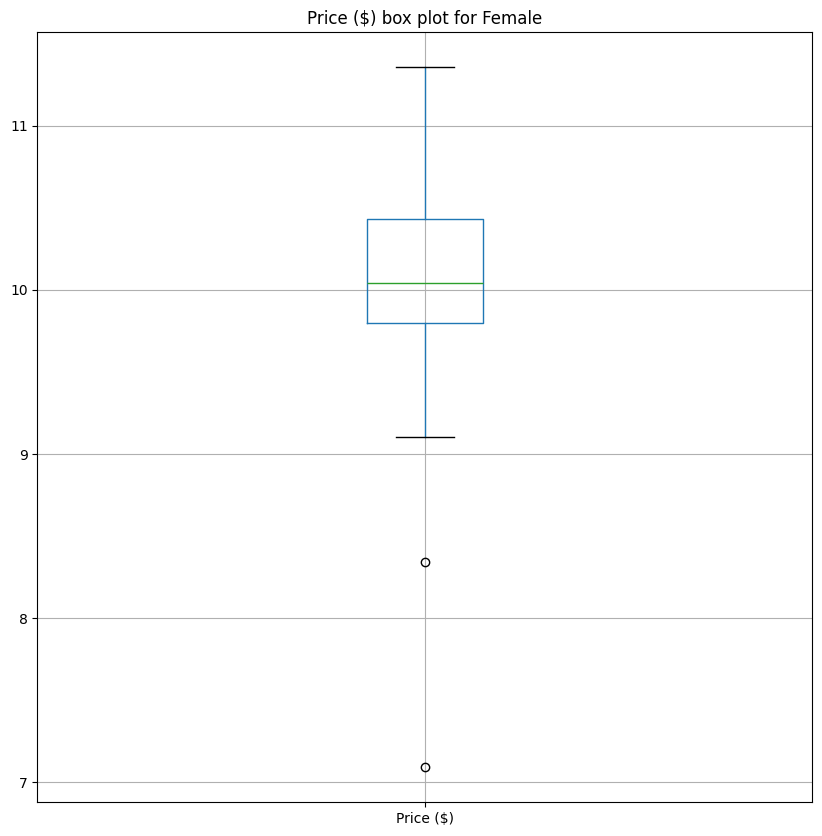

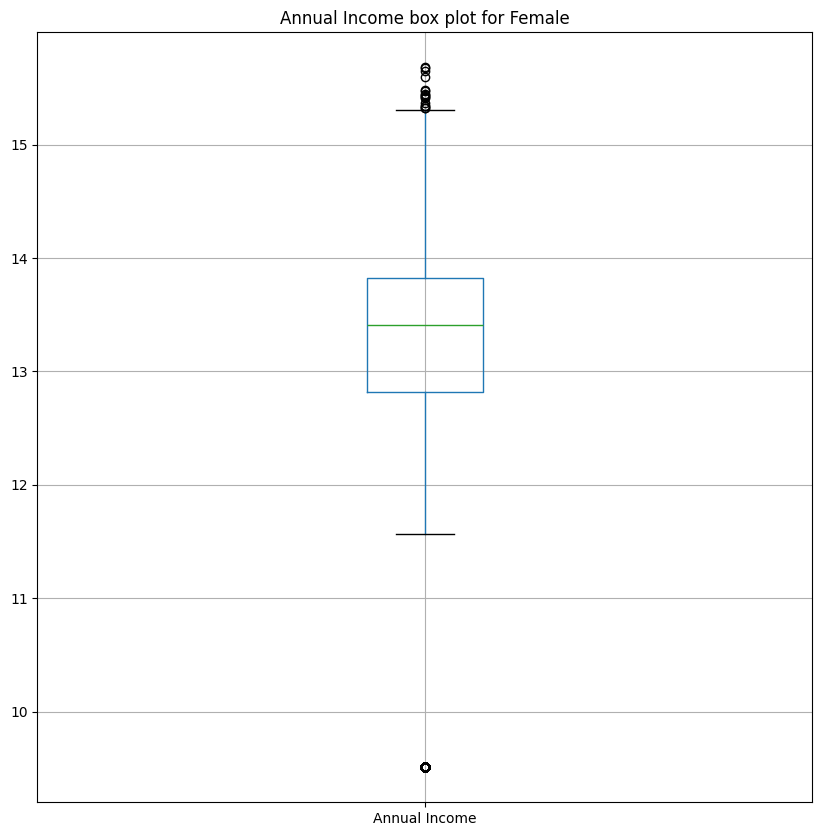

In [290]:
for col in ['Price ($)', 'Annual Income']:
    plt.figure(figsize=(10, 10))
    female_df.boxplot(column=col)
    plt.title(f"{col} box plot for Female")
    ax = plt.gca()  # Get current axes
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda num, p: f'{int(num):,}'))
    plt.show()


Female statistics


In [291]:
female_df.describe()

,Date,Gender,Annual Income,Engine,Transmission,Price ($),Color_Black,Color_Pale White,Color_Red,Body Style_Hardtop,Body Style_Hatchback,Body Style_Passenger,Body Style_SUV,Body Style_Sedan
count,5108,5108.0,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000
mean,2023-03-05 12:57:30.587314176,0.0,12.718908,0.471613,0.471613,10.129679,0.323610,0.479248,0.197142,0.126664,0.254111,0.172866,0.261355,0.185004
min,2022-01-02 00:00:00,0.0,9.510519,0.000000,0.000000,7.090910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-09-11 00:00:00,0.0,12.821261,0.000000,0.000000,9.798238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023-04-08 00:00:00,0.0,13.407544,0.000000,0.000000,10.043293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023-09-13 06:00:00,0.0,13.820499,1.000000,1.000000,10.434175,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2023-12-31 00:00:00,0.0,15.681140,1.000000,1.000000,11.356283,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.0,1.775455,0.499242,0.499242,0.478184,0.467899,0.499618,0.397879,0.332629,0.435403,0.378168,0.439416,0.388339


#### Histogram female before:

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Price ($)'}>,
        <Axes: title={'center': 'Color_Black'}>,
        <Axes: title={'center': 'Color_Pale White'}>],
       [<Axes: title={'center': 'Color_Red'}>,
        <Axes: title={'center': 'Body Style_Hardtop'}>,
        <Axes: title={'center': 'Body Style_Hatchback'}>,
        <Axes: title={'center': 'Body Style_Passenger'}>],
       [<Axes: title={'center': 'Body Style_SUV'}>,
        <Axes: title={'center': 'Body Style_Sedan'}>, <Axes: >, <Axes: >]],
      dtype=object)

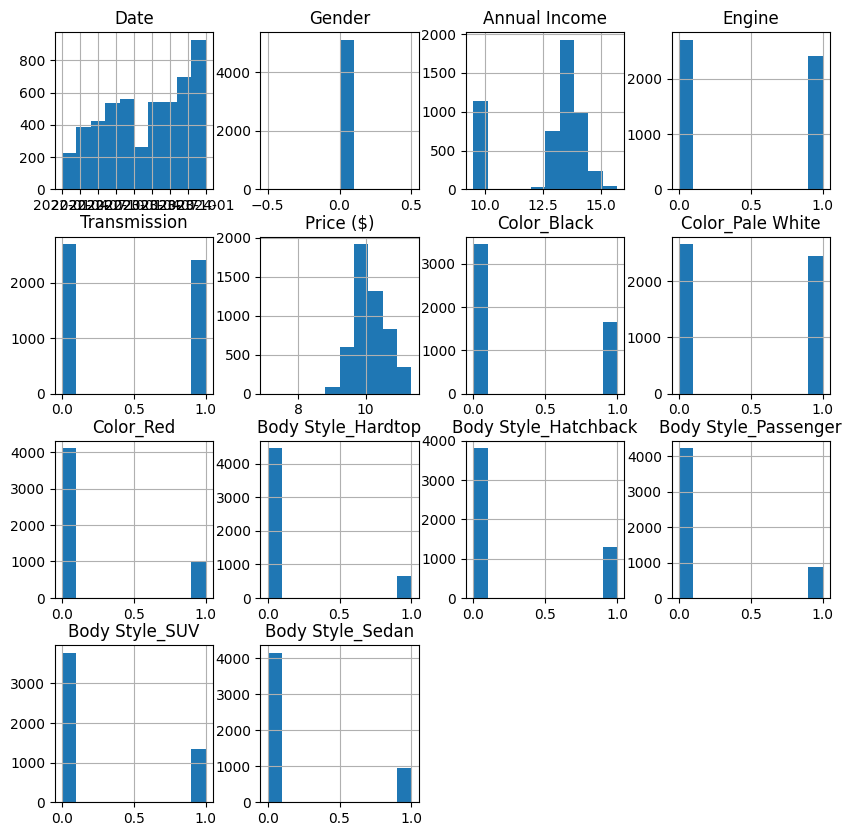

In [292]:
female_df.hist(figsize=(10,10))

##### **Log transform to fix skewness then get rid of outliers with IQR (for price and annual income) Female**

In [293]:
for col in ['Price ($)', 'Annual Income']:
    male_df[col] = np.log1p(male_df[col])

In [294]:
clean_female_df = female_df.copy()
for col in ['Price ($)', 'Annual Income']:
    q1 = clean_female_df[col].quantile(0.25)
    q3 = clean_female_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    clean_female_df = clean_female_df[(clean_female_df[col] >= lower_bound) & (clean_female_df[col] <= upper_bound)]

print(f"Before: {len(female_df)}")
print(f"After: {len(clean_female_df)}")


Before: 5108
After: 3955


#### Boxplot female after:

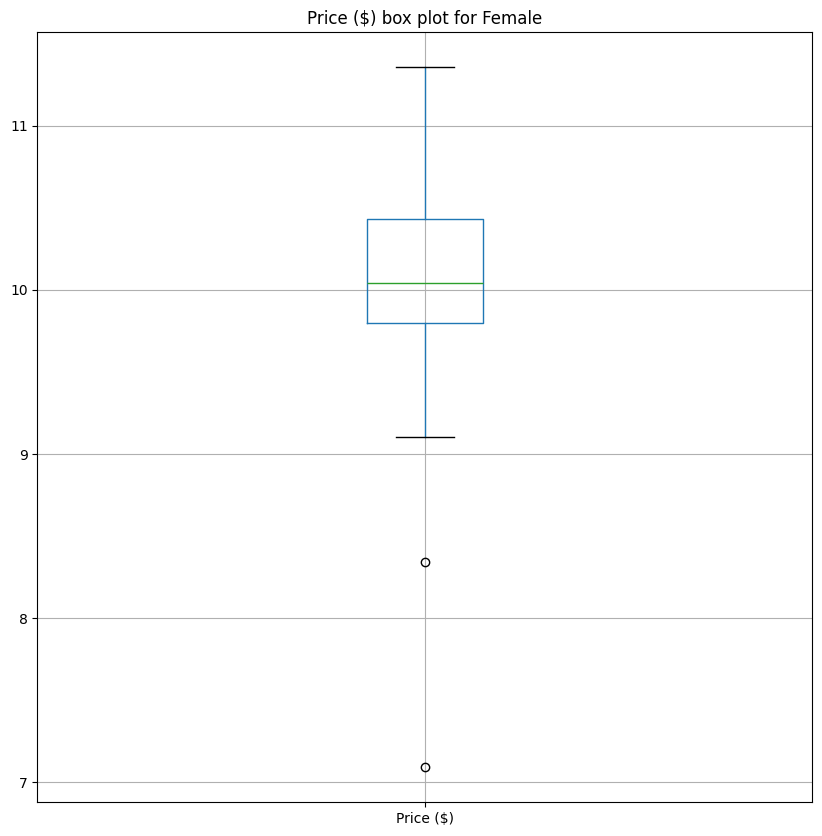

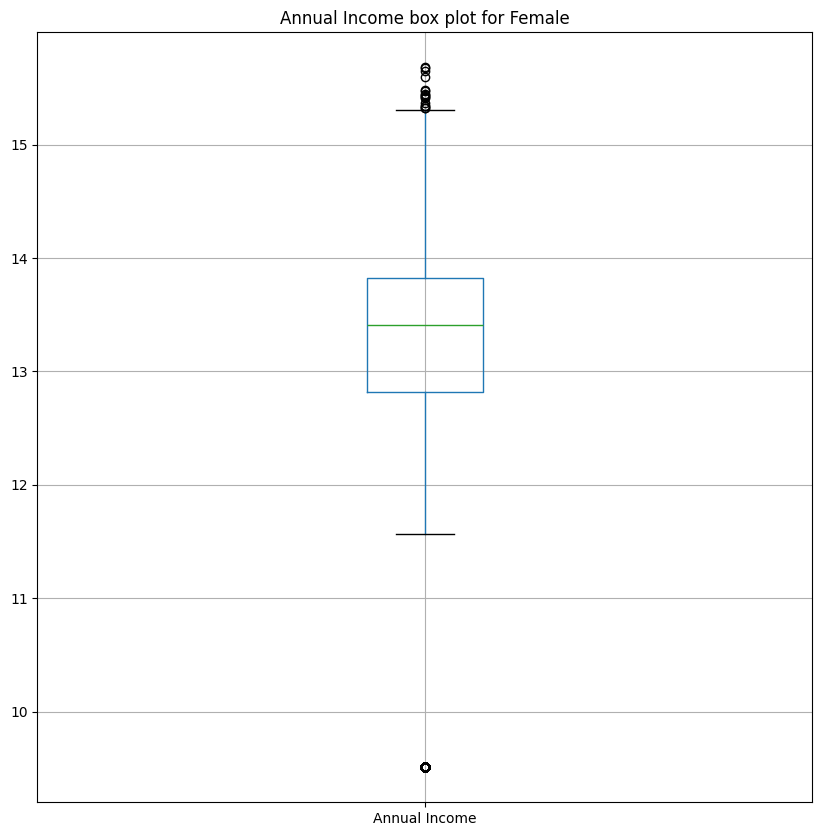

In [295]:
for col in ['Price ($)', 'Annual Income']:
    plt.figure(figsize=(10, 10))
    female_df.boxplot(column=col)
    plt.title(f"{col} box plot for Female")
    ax = plt.gca()  # Get current axes
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda num, p: f'{int(num):,}'))
    plt.show()

#### Histogram female after:

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Price ($)'}>,
        <Axes: title={'center': 'Color_Black'}>,
        <Axes: title={'center': 'Color_Pale White'}>],
       [<Axes: title={'center': 'Color_Red'}>,
        <Axes: title={'center': 'Body Style_Hardtop'}>,
        <Axes: title={'center': 'Body Style_Hatchback'}>,
        <Axes: title={'center': 'Body Style_Passenger'}>],
       [<Axes: title={'center': 'Body Style_SUV'}>,
        <Axes: title={'center': 'Body Style_Sedan'}>, <Axes: >, <Axes: >]],
      dtype=object)

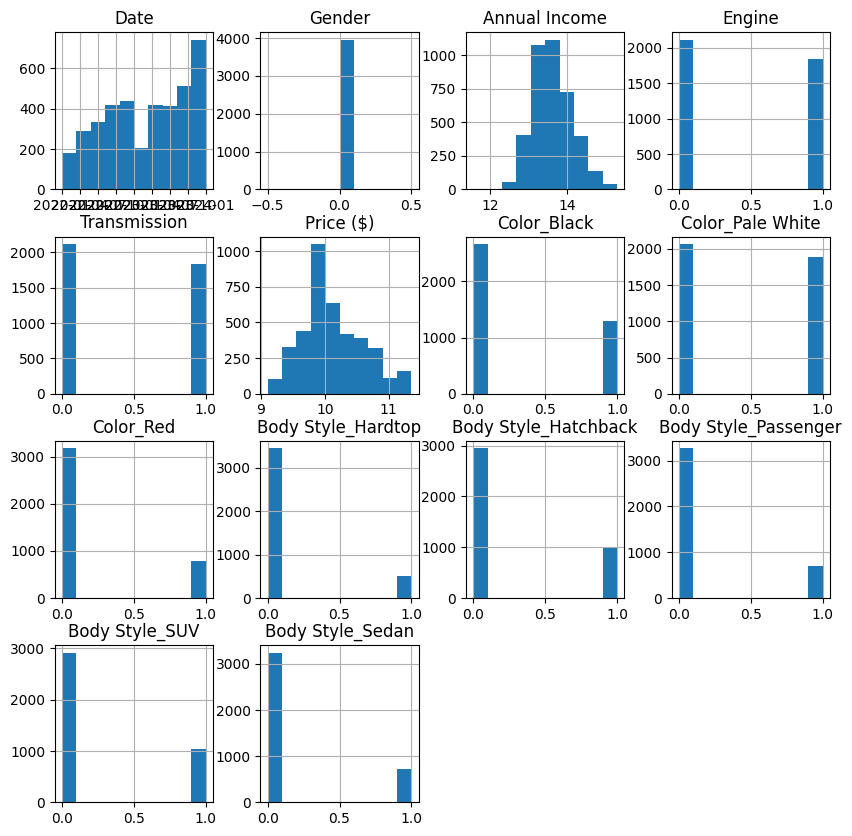

In [296]:
clean_female_df.hist(figsize=(10,10))


# **Now we merge back the cleaned female df and cleaned male df**

In [297]:
clean_df = pd.concat([clean_female_df, clean_male_df], ignore_index=True)
clean_df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,...,Phone,Dealer_Region,Color_Black,Color_Pale White,Color_Red,Body Style_Hardtop,Body Style_Hatchback,Body Style_Passenger,Body Style_SUV,Body Style_Sedan
0,C_CND_000017,2022-01-02,Zoe,0,13.190024,Capitol KIA,Hyundai,Accent,1,1,...,7814646,Greenville,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C_CND_000018,2022-01-02,Zoey,0,13.253393,Chrysler of Tri-Cities,Cadillac,Eldorado,0,0,...,7456650,Pasco,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,C_CND_000027,2022-01-02,Cassandre,0,13.617061,U-Haul CO,Buick,Regal,0,0,...,6362556,Austin,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,C_CND_000053,2022-01-03,Sylvia,0,13.369225,C & M Motors Inc,Mercury,Cougar,0,0,...,6402878,Scottsdale,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,C_CND_000064,2022-01-04,Alyssa,0,12.542548,Nebo Chevrolet,Audi,A6,0,0,...,7419754,Middletown,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18604,C_CND_023897,2023-12-31,Simi,1,2.677068,Rabun Used Car Sales,Dodge,Viper,0,0,...,8744249,Aurora,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
18605,C_CND_023898,2023-12-31,Simone,1,2.650533,Progressive Shippers Cooperative Association No,Mercedes-B,E-Class,0,0,...,6819422,Greenville,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
18606,C_CND_023899,2023-12-31,Skylar,1,2.651877,Rabun Used Car Sales,Volvo,C70,1,1,...,6225183,Pasco,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
18607,C_CND_023904,2023-12-31,Emma,1,2.671798,Chrysler of Tri-Cities,BMW,328i,1,1,...,7659127,Scottsdale,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Price ($)'}>,
        <Axes: title={'center': 'Color_Black'}>,
        <Axes: title={'center': 'Color_Pale White'}>],
       [<Axes: title={'center': 'Color_Red'}>,
        <Axes: title={'center': 'Body Style_Hardtop'}>,
        <Axes: title={'center': 'Body Style_Hatchback'}>,
        <Axes: title={'center': 'Body Style_Passenger'}>],
       [<Axes: title={'center': 'Body Style_SUV'}>,
        <Axes: title={'center': 'Body Style_Sedan'}>, <Axes: >, <Axes: >]],
      dtype=object)

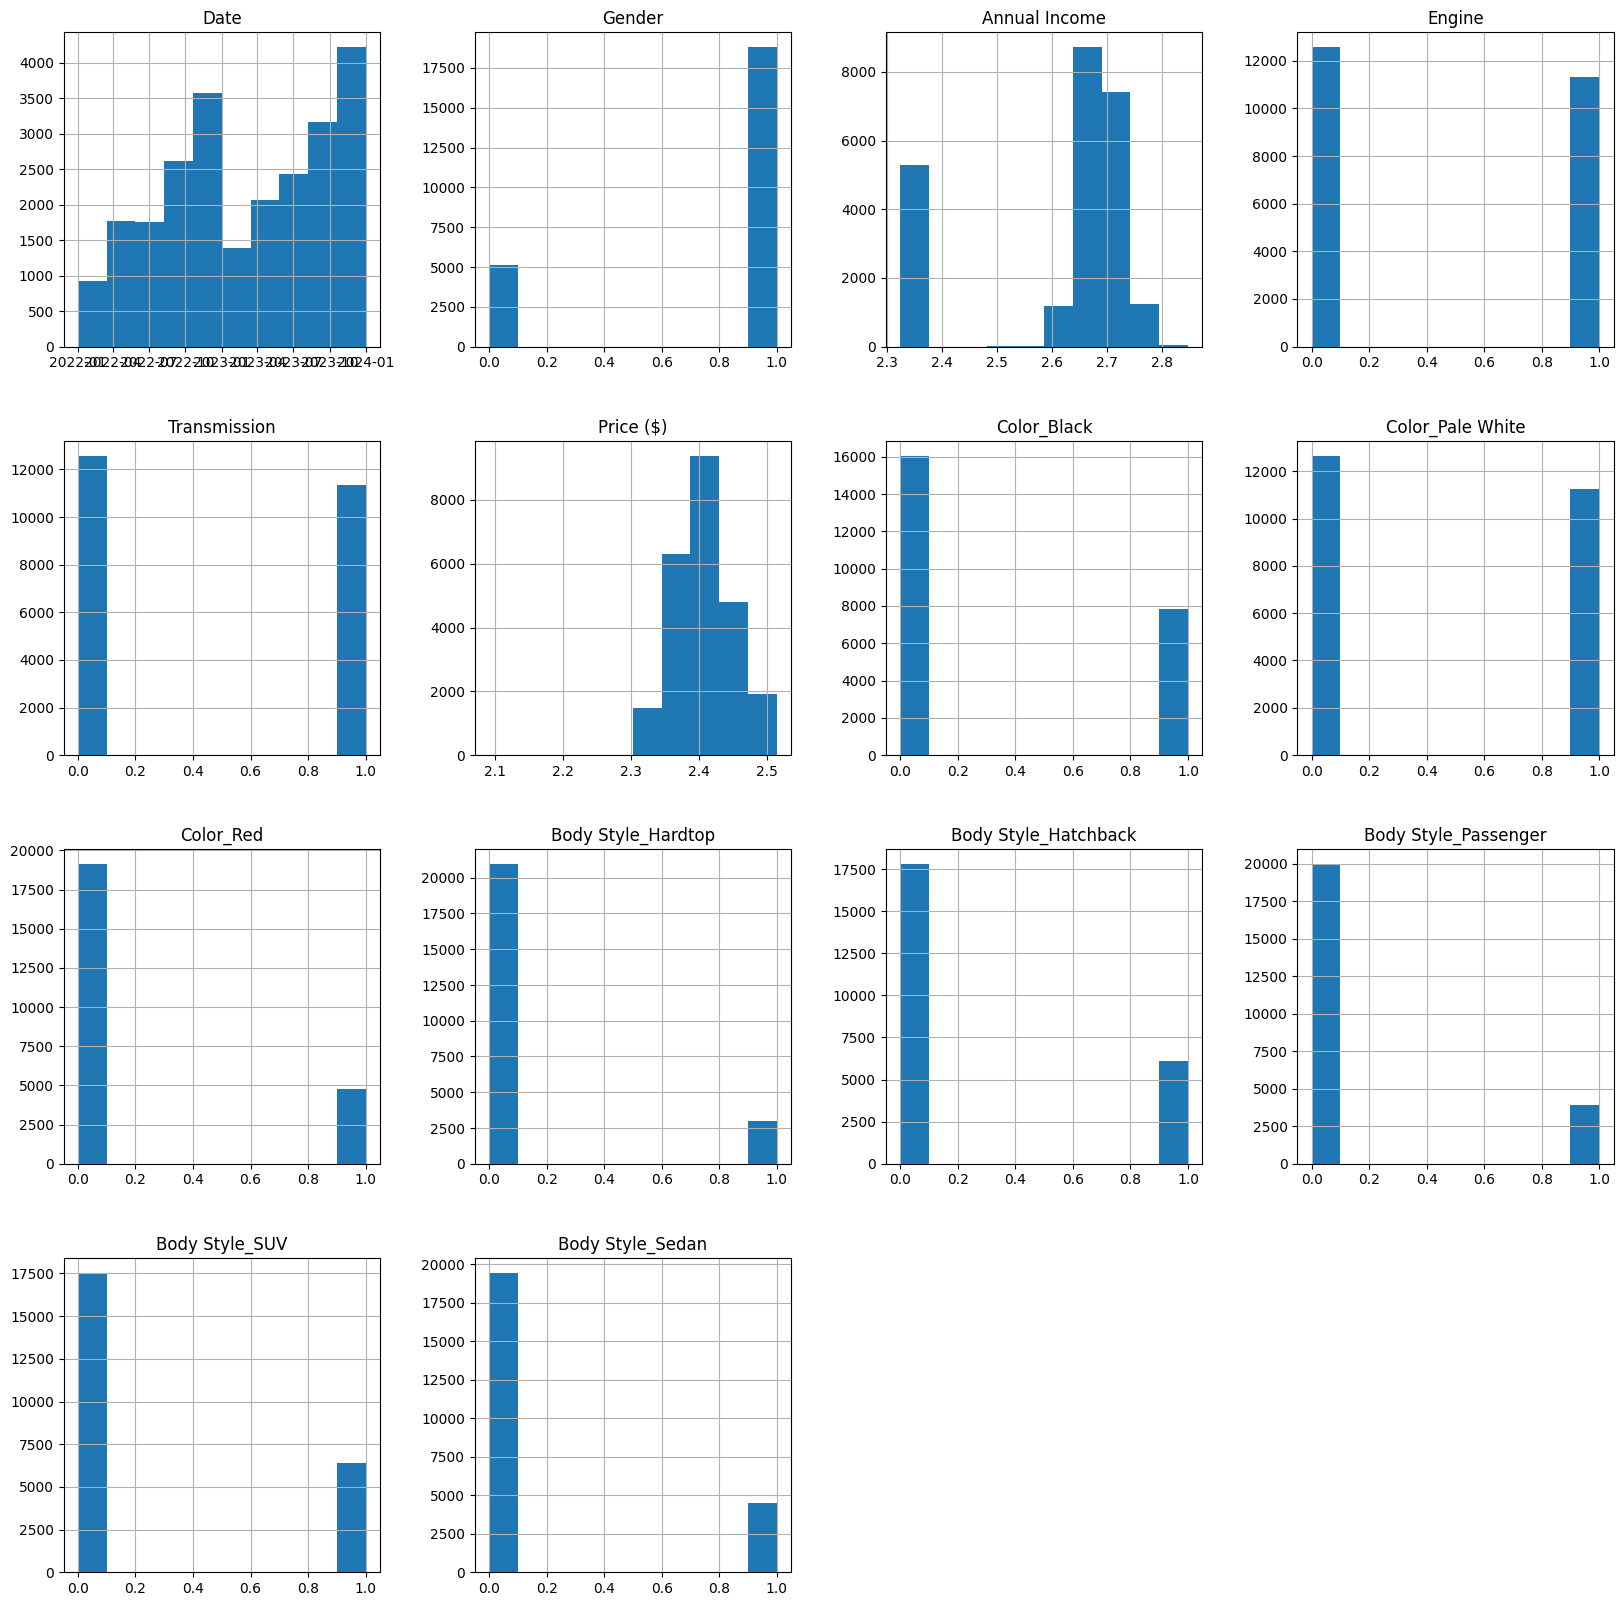

In [298]:
df.hist(figsize=(20,20))

In [299]:
clean_df = clean_df.sample(frac=1).reset_index(drop=True)
#.sample -> method that shuffles
#frac = 1  -> all rows
clean_df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,...,Phone,Dealer_Region,Color_Black,Color_Pale White,Color_Red,Body Style_Hardtop,Body Style_Hatchback,Body Style_Passenger,Body Style_SUV,Body Style_Sedan
0,C_CND_003798,2022-07-09,Rihanna,1,2.685442,Ryder Truck Rental and Leasing,Chevrolet,Prizm,0,0,...,7138936,Middletown,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C_CND_014122,2023-05-27,Lia,0,14.331324,Star Enterprises Inc,Cadillac,Eldorado,0,0,...,7264453,Pasco,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,C_CND_014789,2023-06-12,Kenny,1,2.700856,Race Car Help,Subaru,Forester,1,1,...,6261470,Austin,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,C_CND_000173,2022-01-13,Allison,1,2.663637,Nebo Chevrolet,Nissan,Pathfinder,1,1,...,6438030,Austin,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,C_CND_021207,2023-11-18,Charlotte,1,2.643369,Progressive Shippers Cooperative Association No,Porsche,Carrera Coupe,1,1,...,8079683,Janesville,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18604,C_CND_012844,2023-04-16,Emma,1,2.663882,Rabun Used Car Sales,BMW,528i,0,0,...,7083791,Scottsdale,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18605,C_CND_020871,2023-11-11,Stephen,1,2.664433,New Castle Ford Lincoln Mercury,Lincoln,Town car,1,1,...,8763190,Pasco,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18606,C_CND_005050,2022-08-29,Liba,1,2.748964,McKinney Dodge Chrysler Jeep,Plymouth,Neon,0,0,...,6691329,Scottsdale,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18607,C_CND_009274,2022-12-05,Avery,1,2.722014,Progressive Shippers Cooperative Association No,Oldsmobile,Silhouette,0,0,...,6607688,Janesville,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



## Last thing to do is save the data with


In [300]:
clean_df.to_csv('cleaned_car_data.csv', index=False)